<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Project 3: Medical Cost Personal Datasets

### Objective

- In this project, I will analyze a health insurance company's data to predict future insurance claim amounts and identify factors that lead to higher healthcare costs.

- Predict ['Charges']

### Models to understand data
- Linear Regression 
- Random Forest
- XG Boost

### Features

- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance (that were billed to the insurance company).

Note: 
What is beneficiary: A beneficiary is the person or entity you name in a life insurance policy to receive the death benefit.


Original Data: [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import math
from scipy import stats

from sklearn.preprocessing import StandardScaler,LabelEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, RidgeCV, Ridge
from sklearn.ensemble import GradientBoostingRegressor, StackingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

import plotly.graph_objects as go
import plotly.express as px


## I. Taking a glance at the data

In [2]:
#Reading the file
data = pd.read_csv("insurance.csv")

In [3]:
# looking at the first 5 rows 
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [4]:
#we have 1338 rows and 7 columns
data.shape

(1338, 7)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#statistical infomation
data.describe().T

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [7]:
#check for null values 
#there are no nulls in this dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Clean the Data

### Encode Categorical Column
- Sex
- Smoker
- Region

#### 1. Encoding ['Sex']

In [9]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
#Encode Sex data
data['sex_encoded'] = data['sex'].apply(lambda x: 1 if x =='male' else 0)

In [11]:
data

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      sex_encoded  
0               0  
1               1  
2               1  
3               1  
4               1  
...           ...  
1333            1  
1334            0  
1335            0  
1336            0  
1337            0  

[1338 rows x 8 columns]

In [12]:
#male : 1, female : 0
data['sex_encoded'].value_counts()

1    676
0    662
Name: sex_encoded, dtype: int64

In [13]:
#dataset is pretty balanced for gender
fig = go.Figure(data=[go.Pie(labels=data['sex'].value_counts().index, values=data['sex'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing gender")
fig.show()

#### 2. Encoding ['Smoker']

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
#Encode Smoker data
data['smoker_encoded'] = data['smoker'].apply(lambda x: 1 if x =='yes' else 0)

In [16]:
#yes : 1, no : 0
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [17]:
#79.5% are non-smokers, while 20.5% are smokers
fig = go.Figure(data=[go.Pie(labels=data['smoker'].value_counts().index, values=data['smoker'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing % of smokers")
fig.show()

#### 3. Encoding ['Region']

In [18]:
data['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [19]:
data['region'].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [20]:
#Replace region data for clear visibility 
data['region']=data['region'].str.replace('southeast','SE')
data['region']=data['region'].str.replace('southwest','SW')
data['region']=data['region'].str.replace('northwest','NW')
data['region']=data['region'].str.replace('northeast','NE')

In [21]:
data['region'].value_counts()

SE    364
NW    325
SW    325
NE    324
Name: region, dtype: int64

In [22]:
#Encode Region data
#'SE' : 1, 'SW' : 2, 'NW' : 3, 'NE' : 4 

data['region_encoded'] = data['region'].copy()
data['region_encoded'].replace({'SE' : 1, 'SW' : 2, 'NW' : 3, 'NE' : 4},
        inplace=True)


In [23]:
data

age     sex     bmi  children smoker region      charges  sex_encoded  \
0      19  female  27.900         0    yes     SW  16884.92400            0   
1      18    male  33.770         1     no     SE   1725.55230            1   
2      28    male  33.000         3     no     SE   4449.46200            1   
3      33    male  22.705         0     no     NW  21984.47061            1   
4      32    male  28.880         0     no     NW   3866.85520            1   
...   ...     ...     ...       ...    ...    ...          ...          ...   
1333   50    male  30.970         3     no     NW  10600.54830            1   
1334   18  female  31.920         0     no     NE   2205.98080            0   
1335   18  female  36.850         0     no     SE   1629.83350            0   
1336   21  female  25.800         0     no     SW   2007.94500            0   
1337   61  female  29.070         0    yes     NW  29141.36030            0   

      smoker_encoded  region_encoded  
0                  1               2  
1                  0               1  
2                  0               1  
3                  0               3  
4                  0               3  
...              ...             ...  
1333               0               3  
1334               0               4  
1335               0               1  
1336               0               2  
1337               1               3  

[1338 rows x 10 columns]

In [24]:
fig = go.Figure(data=[go.Pie(labels=data['region'].value_counts().index, values=data['region'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing Region")
fig.show()

In [25]:
#data encoded for the model testing 
data.dtypes

age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
sex_encoded         int64
smoker_encoded      int64
region_encoded      int64
dtype: object

In [26]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoded', 'smoker_encoded', 'region_encoded'],
      dtype='object')

### Visualise on ['Age']

In [27]:
data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [28]:
data['age'].min()

18

In [29]:
data['age'].max()

64

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='age', ylabel='Count'>

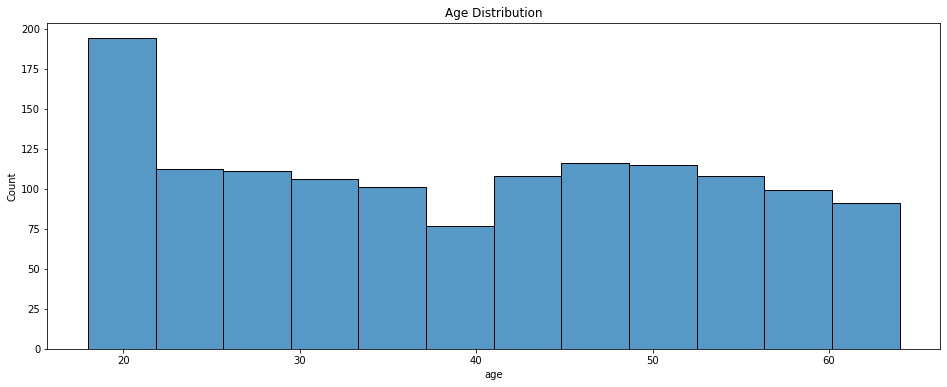

In [30]:
plt.figure(figsize=(16,6))
plt.title('Age Distribution')
sns.histplot(data['age'])

In [31]:
def age_buckets(x): 
    if x < 30: 
        return '18 to 29 years' 
    elif x < 45: return '30 to 44 years' 
    elif x < 60: return '45 to 59 years' 
    else: return '60 and over'
    
data['Age_groups'] = data.age.apply(age_buckets)
data['Age_groups'].value_counts(sort=False)

30 to 44 years    392
18 to 29 years    417
60 and over       114
45 to 59 years    415
Name: Age_groups, dtype: int64

### Visualise on ['bmi']

(BMI = kg / m ^ 2) using the ratio of height to weight

According to Healthhub

- BMI < 18.5 is underweight range
- BMI 18.5 to <25 is healthy weight range
- BMI 25.0 to <30is overweight range
- BMI 30.0 or higher is obesity range.

In [32]:
data.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

<AxesSubplot:title={'center':'BMI Distribution'}, xlabel='bmi', ylabel='Count'>

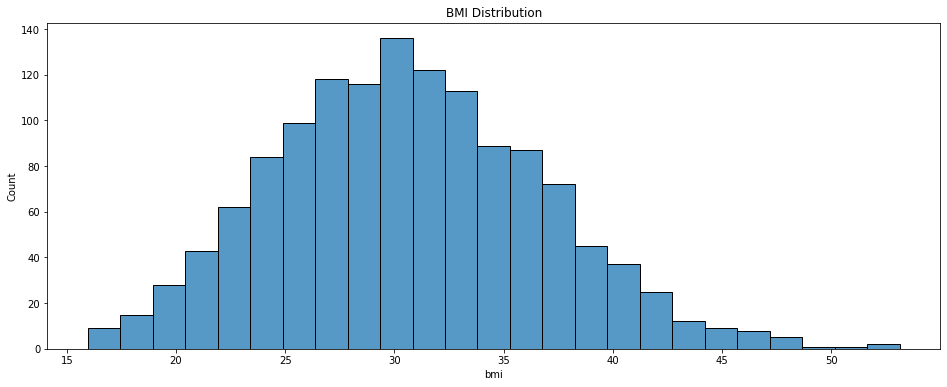

In [33]:
plt.figure(figsize=(16,6))
plt.title('BMI Distribution')
sns.histplot(data['bmi'])

In [34]:
#Creating [overweight] column from [bmi] columm 
data['overweight'] = data['bmi'].apply(lambda x: 'Overweight' if x > 25 else 'Otherweight' )

In [35]:
# 1 is x > 25 overweight
# 0 is normal or underweight
data['overweight'].value_counts()

Overweight     1091
Otherweight     247
Name: overweight, dtype: int64

In [36]:
data['overweight']

0        Overweight
1        Overweight
2        Overweight
3       Otherweight
4        Overweight
           ...     
1333     Overweight
1334     Overweight
1335     Overweight
1336     Overweight
1337     Overweight
Name: overweight, Length: 1338, dtype: object

In [37]:
data

age     sex     bmi  children smoker region      charges  sex_encoded  \
0      19  female  27.900         0    yes     SW  16884.92400            0   
1      18    male  33.770         1     no     SE   1725.55230            1   
2      28    male  33.000         3     no     SE   4449.46200            1   
3      33    male  22.705         0     no     NW  21984.47061            1   
4      32    male  28.880         0     no     NW   3866.85520            1   
...   ...     ...     ...       ...    ...    ...          ...          ...   
1333   50    male  30.970         3     no     NW  10600.54830            1   
1334   18  female  31.920         0     no     NE   2205.98080            0   
1335   18  female  36.850         0     no     SE   1629.83350            0   
1336   21  female  25.800         0     no     SW   2007.94500            0   
1337   61  female  29.070         0    yes     NW  29141.36030            0   

      smoker_encoded  region_encoded      Age_groups   overweight  
0                  1               2  18 to 29 years   Overweight  
1                  0               1  18 to 29 years   Overweight  
2                  0               1  18 to 29 years   Overweight  
3                  0               3  30 to 44 years  Otherweight  
4                  0               3  30 to 44 years   Overweight  
...              ...             ...             ...          ...  
1333               0               3  45 to 59 years   Overweight  
1334               0               4  18 to 29 years   Overweight  
1335               0               1  18 to 29 years   Overweight  
1336               0               2  18 to 29 years   Overweight  
1337               1               3     60 and over   Overweight  

[1338 rows x 12 columns]

In [38]:
data['overweight_encoded'] = data['overweight'].apply(lambda x: 1 if x =='Overweight' else 0)

In [39]:
fig = go.Figure(data=[go.Pie(labels=data['overweight'].value_counts().index, values=data['overweight'].value_counts().values)])
fig.update_layout(height=400, width=500, title_text="Pie chart showing overweight")
fig.show()

In [40]:
result_df = pd.crosstab(data['overweight'], data['sex'],normalize = 'index')
result_df

sex            female      male
overweight                     
Otherweight  0.530364  0.469636
Overweight   0.486709  0.513291

<AxesSubplot:xlabel='overweight', ylabel='count'>

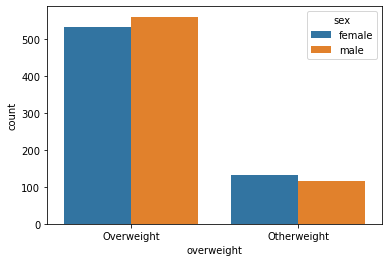

In [41]:
sns.countplot(x="overweight",hue = 'sex',data=data)

In [42]:
result_df = pd.crosstab(data['overweight'], data['smoker'],normalize = 'index')
result_df

smoker             no       yes
overweight                     
Otherweight  0.777328  0.222672
Overweight   0.799267  0.200733

<AxesSubplot:xlabel='overweight', ylabel='count'>

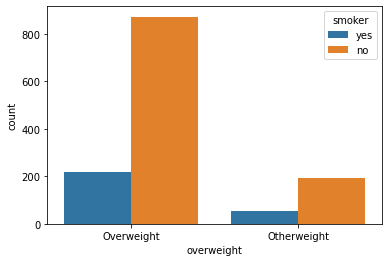

In [43]:
sns.countplot(x = 'overweight',hue='smoker',data = data)

### Visualise on ['children']

In [44]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/Users/anna_hj/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'No of children Distribution'}, xlabel='children', ylabel='count'>

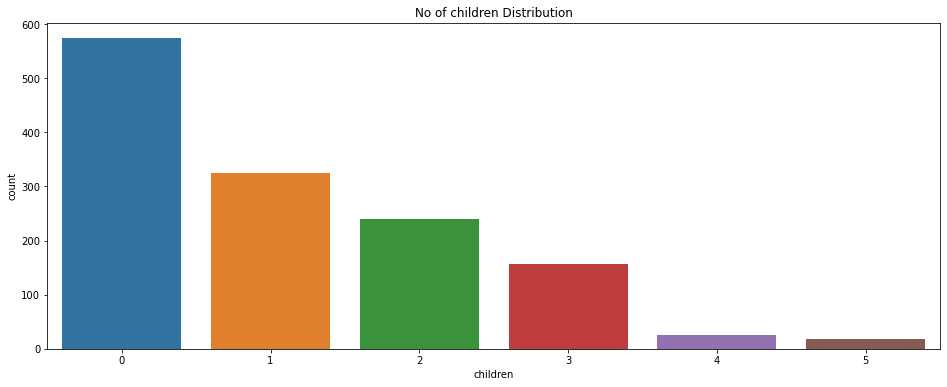

In [45]:
plt.figure(figsize=(16,6))
plt.title('No of children Distribution')
sns.countplot(data['children'])

### Visualise on ['charges']

In [46]:
data.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [47]:
data[data['charges']>50000]

age     sex     bmi  children smoker region      charges  sex_encoded  \
34     28    male  36.400         1    yes     SW  51194.55914            1   
543    54  female  47.410         0    yes     SE  63770.42801            0   
577    31  female  38.095         1    yes     NE  58571.07448            0   
819    33  female  35.530         0    yes     NW  55135.40209            0   
1146   60    male  32.800         0    yes     SW  52590.82939            1   
1230   52    male  34.485         3    yes     NW  60021.39897            1   
1300   45    male  30.360         0    yes     SE  62592.87309            1   

      smoker_encoded  region_encoded      Age_groups  overweight  \
34                 1               2  18 to 29 years  Overweight   
543                1               1  45 to 59 years  Overweight   
577                1               4  30 to 44 years  Overweight   
819                1               3  30 to 44 years  Overweight   
1146               1               2     60 and over  Overweight   
1230               1               3  45 to 59 years  Overweight   
1300               1               1  45 to 59 years  Overweight   

      overweight_encoded  
34                     1  
543                    1  
577                    1  
819                    1  
1146                   1  
1230                   1  
1300                   1

In [48]:
data.query('charges >= 50000')['smoker'].value_counts()

yes    7
Name: smoker, dtype: int64

<AxesSubplot:title={'center':'Amount_to_be_claim Distribution'}, xlabel='charges', ylabel='Count'>

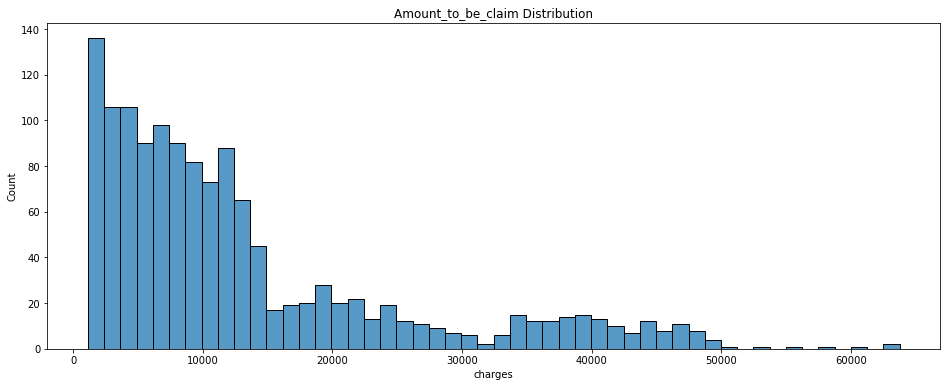

In [49]:
plt.figure(figsize=(16,6))
plt.title('Amount_to_be_claim Distribution')
sns.histplot(data['charges'], bins=50)

In [50]:
px.box(data[['charges']], y='charges', points='all', title='charges distribution across dataset')

## Compare between features
After basic statistics, we will explore more insights.

In [51]:
data.corr()

age       bmi  children   charges  sex_encoded  \
age                 1.000000  0.109272  0.042469  0.299008    -0.020856   
bmi                 0.109272  1.000000  0.012759  0.198341     0.046371   
children            0.042469  0.012759  1.000000  0.067998     0.017163   
charges             0.299008  0.198341  0.067998  1.000000     0.057292   
sex_encoded        -0.020856  0.046371  0.017163  0.057292     1.000000   
smoker_encoded     -0.025019  0.003750  0.007673  0.787251     0.076185   
region_encoded      0.006308 -0.262754  0.001205 -0.039473    -0.012816   
overweight_encoded  0.091367  0.658534 -0.008881  0.117372     0.033876   

                    smoker_encoded  region_encoded  overweight_encoded  
age                      -0.025019        0.006308            0.091367  
bmi                       0.003750       -0.262754            0.658534  
children                  0.007673        0.001205           -0.008881  
charges                   0.787251       -0.039473            0.117372  
sex_encoded               0.076185       -0.012816            0.033876  
smoker_encoded            1.000000       -0.038873           -0.021092  
region_encoded           -0.038873        1.000000           -0.140800  
overweight_encoded       -0.021092       -0.140800            1.000000

<AxesSubplot:>

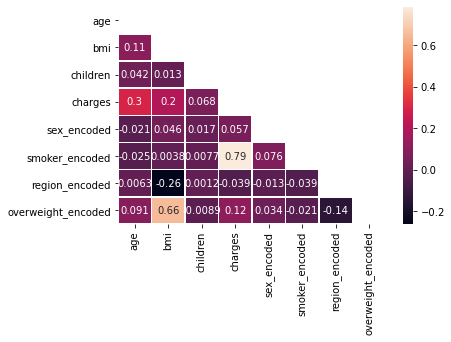

In [52]:
corr = data.corr('pearson')
mask = np.triu(corr)
sns.heatmap(corr , linewidth = 0.5,mask = mask , annot = True )

The correlation matrix shows that smokers have a strong positive relationship with insurance charges at 0.79, but overall, the variables in the dataset are not too highly correlated with each other.

In [53]:
# cheacking pearson correlation coefficient
# There is no realtion between age and charges
data[['charges','smoker_encoded']].corr(method='pearson')

charges  smoker_encoded
charges         1.000000        0.787251
smoker_encoded  0.787251        1.000000

In [54]:
px.box(data[['charges','Age_groups']], x='Age_groups',y='charges',points='all',color='Age_groups',title='Dispersion of charges based by Age_groups')

In [55]:
data.select_dtypes(include=['object']).describe()

sex smoker region      Age_groups  overweight
count   1338   1338   1338            1338        1338
unique     2      2      4               4           2
top     male     no     SE  18 to 29 years  Overweight
freq     676   1064    364             417        1091

In [56]:
data['Age_groups'].unique()

array(['18 to 29 years', '30 to 44 years', '45 to 59 years',
       '60 and over'], dtype=object)

In [57]:
data.groupby('Age_groups')["charges"].mean()

Age_groups
18 to 29 years     9182.487125
30 to 44 years    12490.912530
45 to 59 years    15922.929285
60 and over       21248.021885
Name: charges, dtype: float64

In [58]:
#Smoker has higher claims 
AverageClaims=data.select_dtypes(include=['object']).columns.tolist()
for i in AverageClaims:
    obs=data[i].value_counts()
    avg_claim=data.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

In [59]:
#Smoker has higher claims 
AverageClaims=data.select_dtypes(include=['object']).columns.tolist()
for i in AverageClaims:
    obs=data[i].value_counts()
    avg_claim=data.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .style.set_caption("Variable: {}".format(i)))

In [60]:
plot_df = data.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in data['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#B7A294','#B14B51'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

### Among each age group, insurance charges are significantly higher on average in smokers than non-smokers. We also see higher claim amounts as age increases with the most expensive claims in the 60 and over age group.

In [61]:
fig = px.scatter(data, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#B14B51','#B7A294'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()

### In addition to age, claim amounts are positively correlated to body mass index. Among smokers, insurance charges tend to increase with BMI.

In [62]:
plot_df = data.groupby(['region','sex','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index()
fig = px.bar(plot_df, x='region', y='charges', color='sex', height=800,
             title="Average Insurance Costs by Region and Smoking Status",
             color_discrete_map={'Female': '#BFC5DA','Male': '#5D6A92'}, 
             facet_row='smoker', text='charges', opacity=0.85, barmode='group')
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.layout.yaxis2.update(matches=None)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(title="Region", row=1)
fig.update_yaxes(title="Claim Amount, $",  gridcolor='#E3E3E3', zeroline=True, zerolinewidth=2, 
                 showgrid=False, zerolinecolor='#E5E5EA',
                 showline=True, linecolor='#E5E5EA', linewidth=2)
fig.update_layout(font_color="#303030", paper_bgcolor="white", plot_bgcolor="white",
                  bargroupgap=0.05, bargap=0.2,
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.show()

### Non-smokers tend to have smaller insurance claims on average than smokers at a little under SGD10,000 within the region, while smokers' claims range from an average of SGD28000 to over SGD36000. the graph also shows that women who are non smokers have slightly higher average costs than men, while among smokers, men have slightly higher charges on average than women. 

# Drop the Column

In [63]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'sex_encoded', 'smoker_encoded', 'region_encoded', 'Age_groups',
       'overweight', 'overweight_encoded'],
      dtype='object')

In [64]:
#data1 is enocoded data

data1 = data.drop(columns=['sex','smoker','region','Age_groups','overweight','overweight_encoded']) 
data1

age     bmi  children      charges  sex_encoded  smoker_encoded  \
0      19  27.900         0  16884.92400            0               1   
1      18  33.770         1   1725.55230            1               0   
2      28  33.000         3   4449.46200            1               0   
3      33  22.705         0  21984.47061            1               0   
4      32  28.880         0   3866.85520            1               0   
...   ...     ...       ...          ...          ...             ...   
1333   50  30.970         3  10600.54830            1               0   
1334   18  31.920         0   2205.98080            0               0   
1335   18  36.850         0   1629.83350            0               0   
1336   21  25.800         0   2007.94500            0               0   
1337   61  29.070         0  29141.36030            0               1   

      region_encoded  
0                  2  
1                  1  
2                  1  
3                  3  
4                  3  
...              ...  
1333               3  
1334               4  
1335               1  
1336               2  
1337               3  

[1338 rows x 7 columns]

In [65]:
data1.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_encoded', 'smoker_encoded',
       'region_encoded'],
      dtype='object')

In [66]:
data1.dtypes

age                 int64
bmi               float64
children            int64
charges           float64
sex_encoded         int64
smoker_encoded      int64
region_encoded      int64
dtype: object

<ipython-input-67-e9ec8941b994>:9: UserWarning:

tight_layout not applied: number of rows in subplot specifications must be multiples of one another.



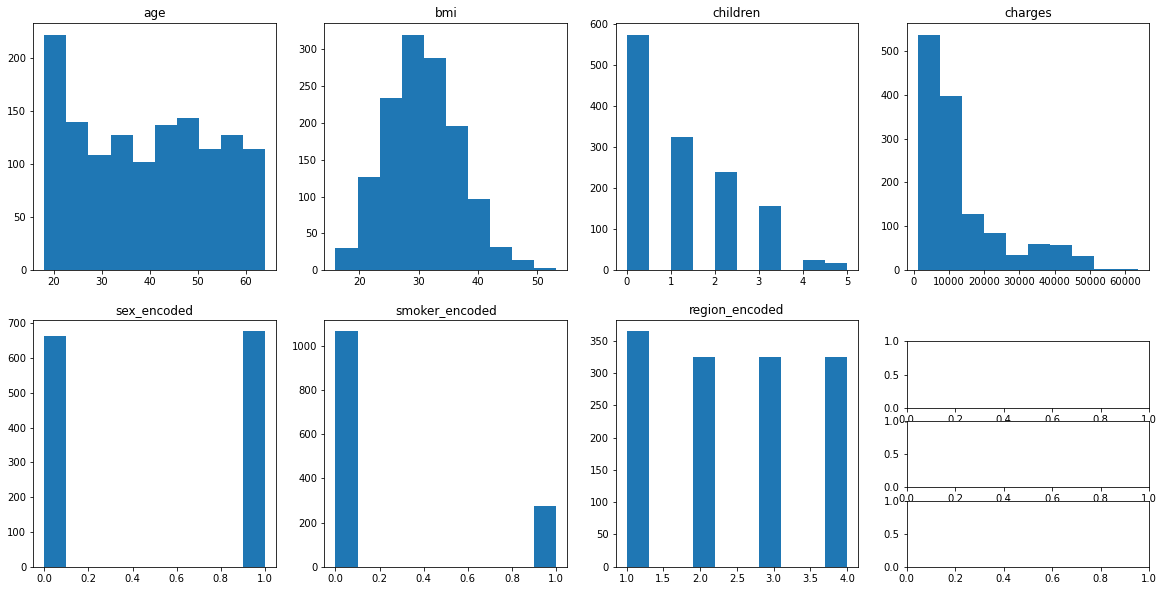

In [67]:
plt.subplots(7,4, figsize=(20,10))  
num=1
for col in data1.columns:
    plt.subplot(2,4,num)
    plt.hist(x=data[col],bins=10)
    plt.title(f'{col}')
    num+=1
    
plt.tight_layout()

# Set Tartget Variable

In [68]:
# Target Variable
# y= target variable 
#Target Variable is charges, becasue we are predicting how much we can claim from insurance company.

y = data1['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [69]:
# Set Predictor Variables
X = data1.drop(['charges'] , axis = 1)
X

age     bmi  children  sex_encoded  smoker_encoded  region_encoded
0      19  27.900         0            0               1               2
1      18  33.770         1            1               0               1
2      28  33.000         3            1               0               1
3      33  22.705         0            1               0               3
4      32  28.880         0            1               0               3
...   ...     ...       ...          ...             ...             ...
1333   50  30.970         3            1               0               3
1334   18  31.920         0            0               0               4
1335   18  36.850         0            0               0               1
1336   21  25.800         0            0               0               2
1337   61  29.070         0            0               1               3

[1338 rows x 6 columns]

# Model

In [70]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [71]:
def model_runner(model,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    mod = model
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    rmse = mean_squared_error(y_test,pred)
    r_square = r2_score(y_test,pred)
    
    length = len(y_test)
    plt.figure(figsize=(20,7))
    plt.title('Plot of Actual charges VS predicted',size=16)
    sns.lineplot(x=np.arange(length),y=y_test,color='red',label='Actual',alpha=0.7)
    sns.lineplot(x=np.arange(length),y=pred,color='green',label='Predicted')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,7))
    plt.title('Plot of Residual',size=16)
    residual = np.array(y_test) - pred
    sns.lineplot(x=np.arange(length),y=residual,color='blue')
    plt.show()
    return pred,rmse,r_square

### Linear Regression 

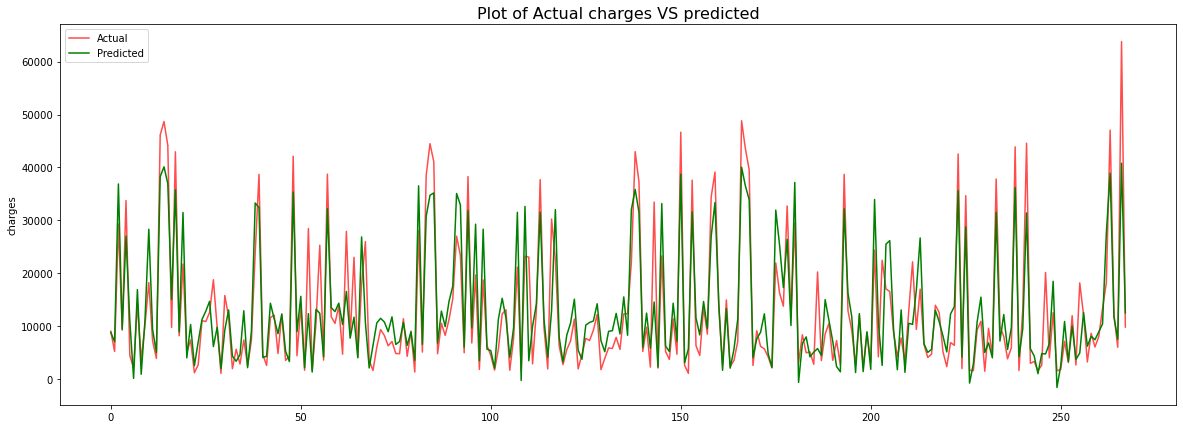

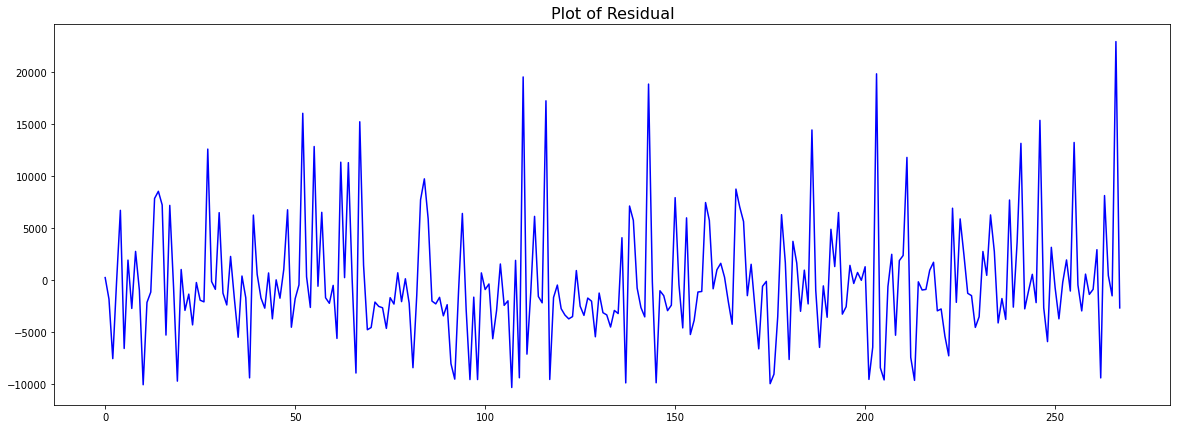

In [72]:
pred_lin,rmse_lin,rsq_lin = model_runner(LinearRegression())

In [73]:
rmse_lin,rsq_lin 

(33544907.381259013, 0.7839279776463969)

### Ridge

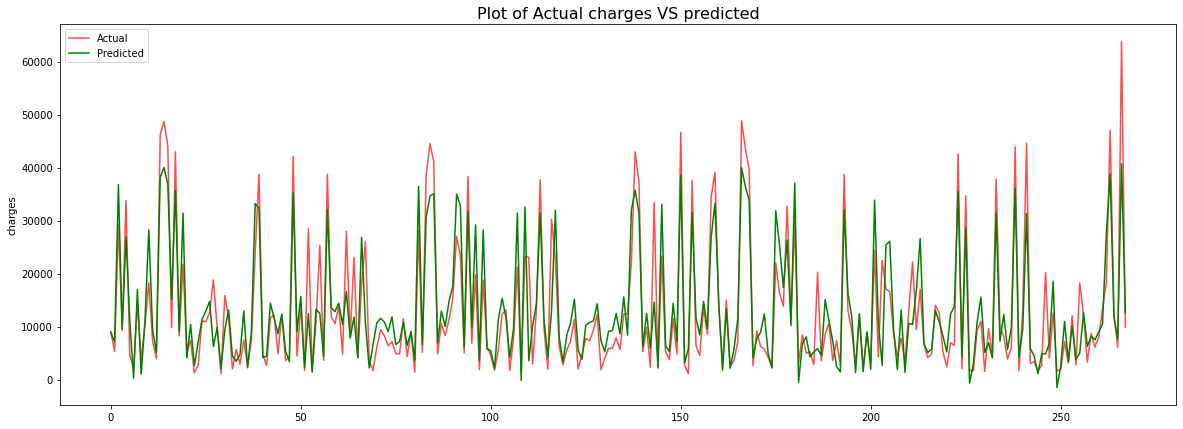

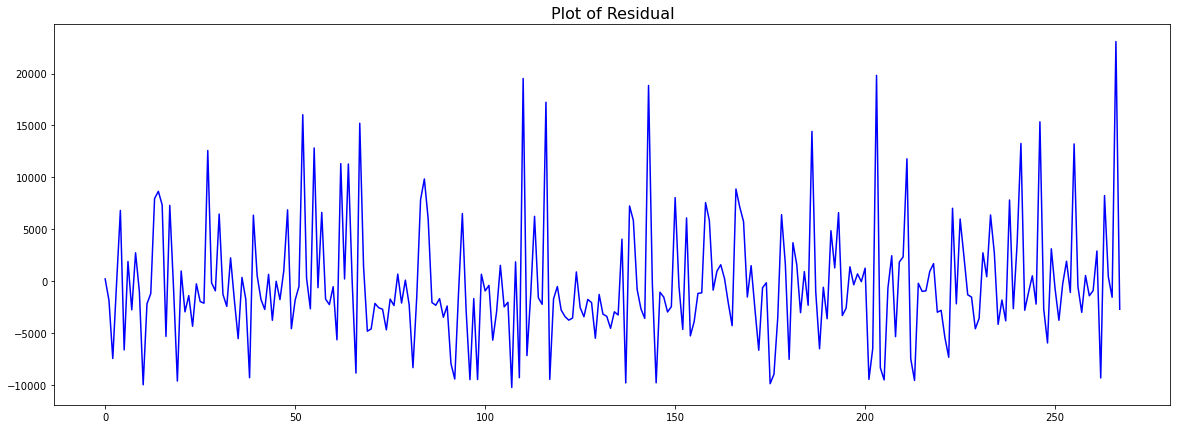

(33589042.145583525, 0.7836436934277728)

In [74]:
pred_r,rmse_r,rsq_r = model_runner(Ridge())
rmse_r,rsq_r

### Lasso

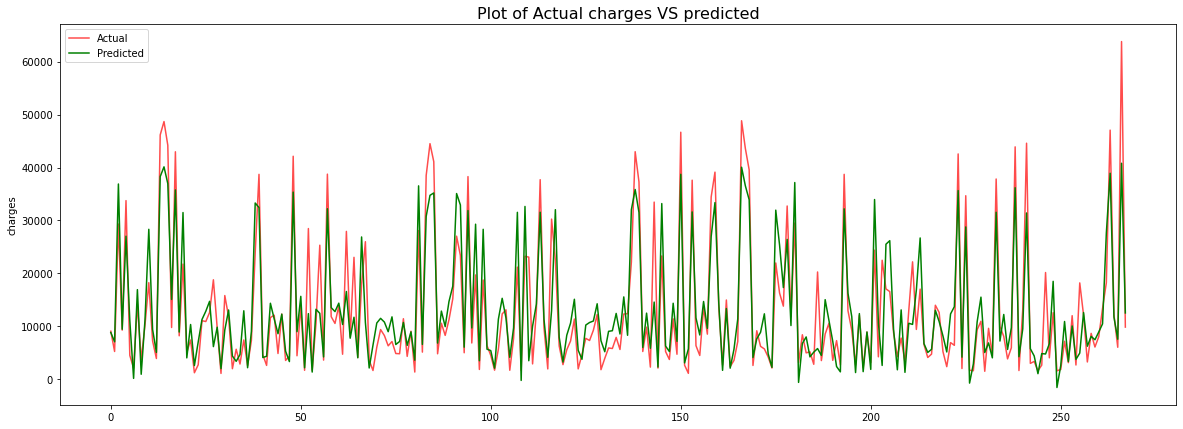

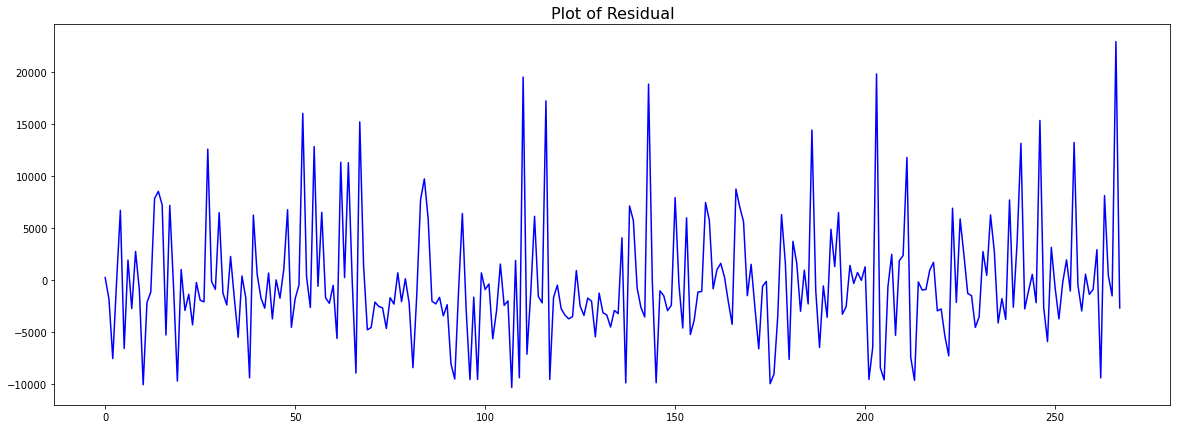

(33549692.667619668, 0.7838971542939954)

In [75]:
pred_l,rmse_l,rsq_l = model_runner(Lasso())
rmse_l,rsq_l

### ElasticNet

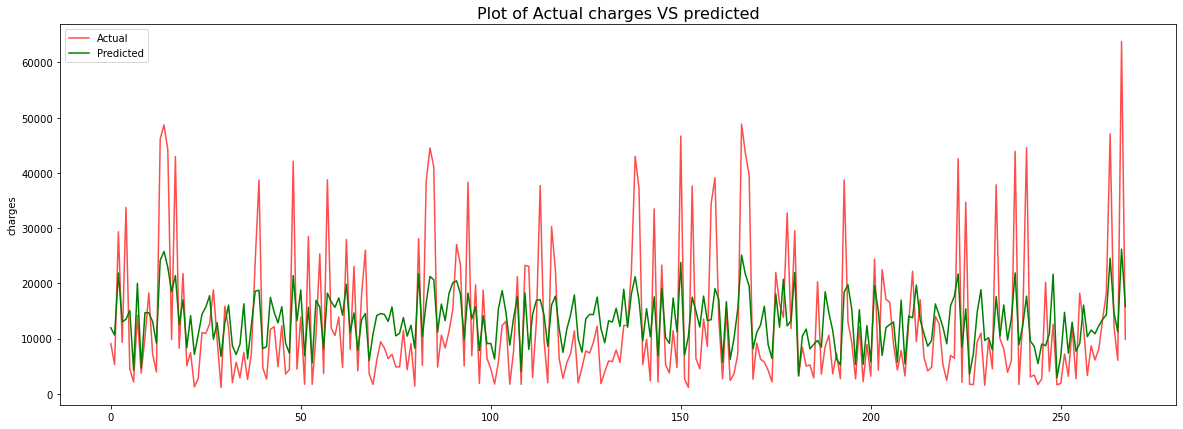

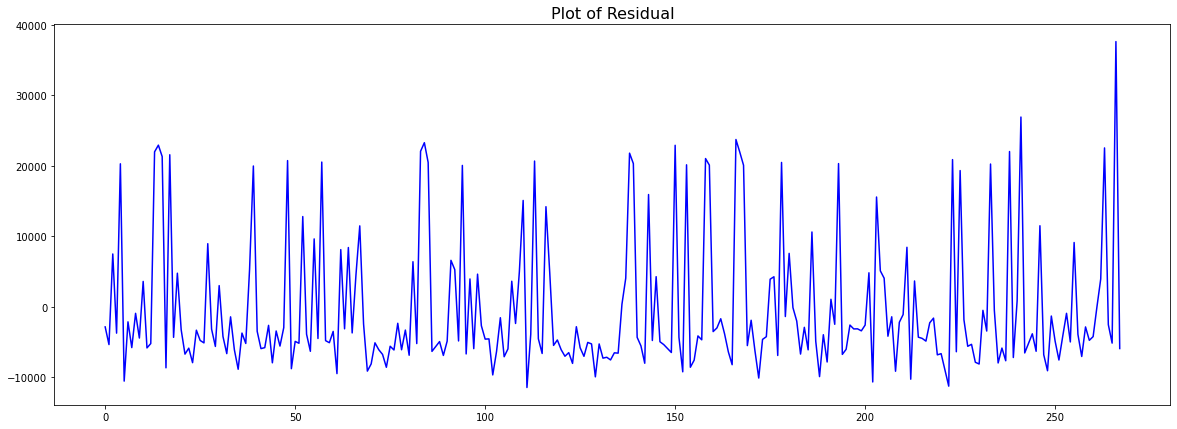

(90349503.86407174, 0.41803386735653103)

In [76]:
pred_eln,rmse_eln,rsq_eln = model_runner(ElasticNet())
rmse_eln,rsq_eln

### Ramdom Forest

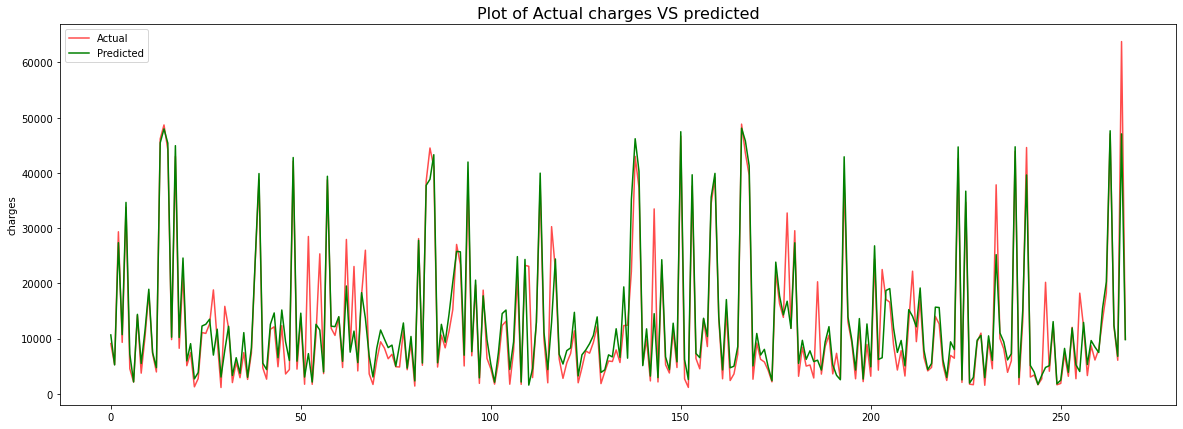

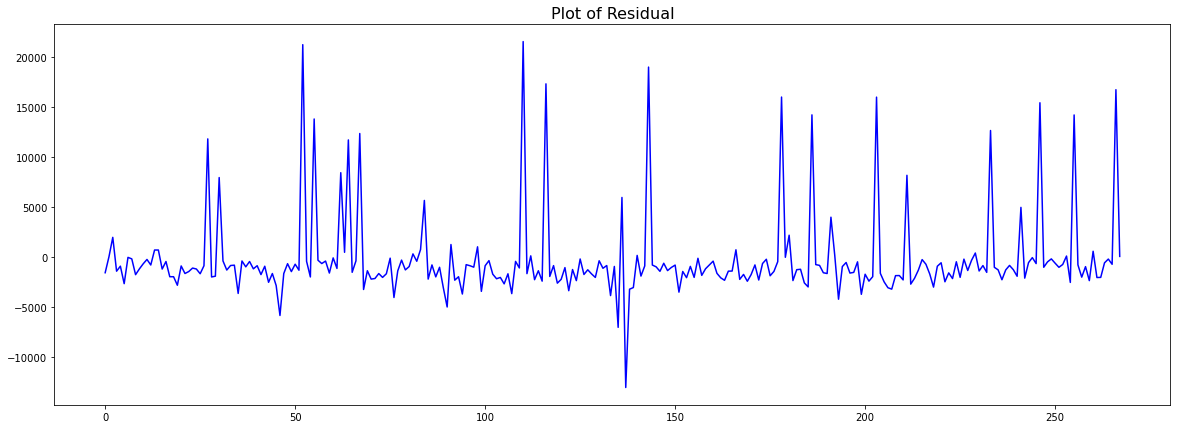

In [77]:
pred_rf,rmse_rf,rsq_rf = model_runner(RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6))

In [78]:
rmse_rf,rsq_rf

(18820631.003075443, 0.8787711125093944)

In [79]:
rfc= RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)

In [80]:
rfc.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500)

In [81]:
rfc.score(X_train,y_train)

0.9009844767998938

In [82]:
rfc.score(X_test,y_test)

0.8789598232765513

In [83]:
pred_rf2 = rfc.predict(X_test)

In [84]:
rfc_rmse = mean_squared_error(y_test,pred_rf2)
rfc_rmse

18791333.8958555

In [85]:
r_square = r2_score(y_test,pred_rf2)
r_square

0.8789598232765513

In [86]:
print('train' , rfc.score(X_train , y_train))
print('test' , rfc.score(X_test , y_test))
print('RMSE : ', rfc_rmse)
print('r2 : ', r_square)

train 0.9009844767998938
test 0.8789598232765513
RMSE :  18791333.8958555
r2 :  0.8789598232765513


### Adaboost

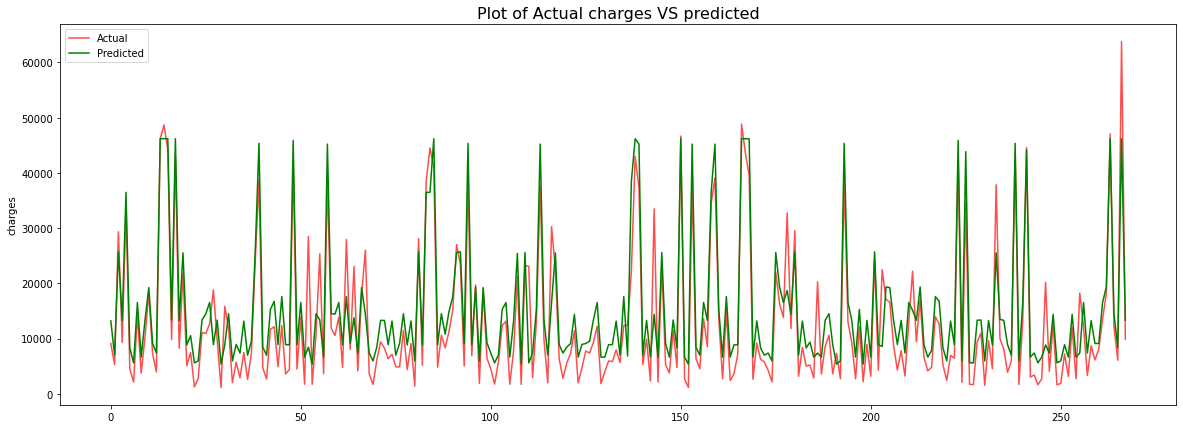

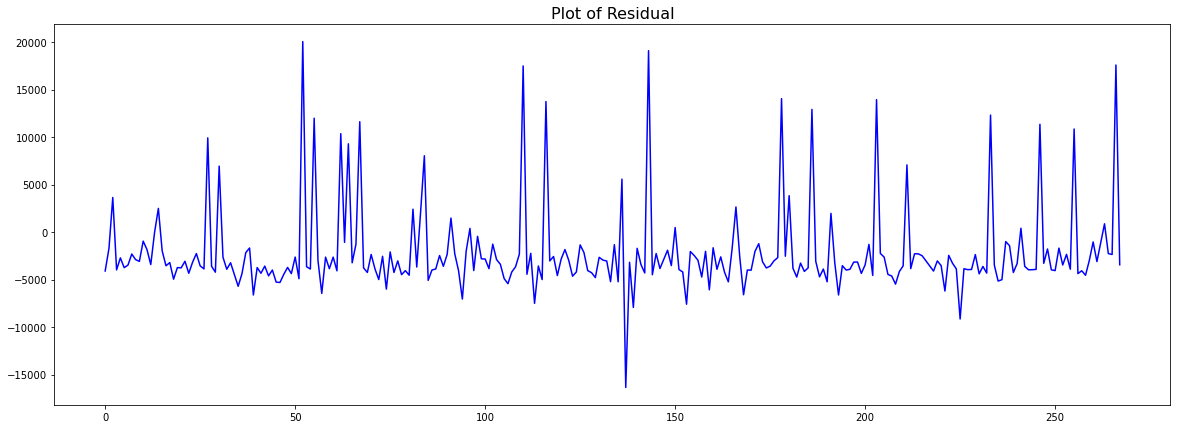

In [87]:
pred_ada,rmse_ada,rsq_ada = model_runner(AdaBoostRegressor(learning_rate = 0.1 ))


In [88]:
rmse_ada,rsq_ada

(26186382.027949728, 0.8313262738038067)

### GradientBoost

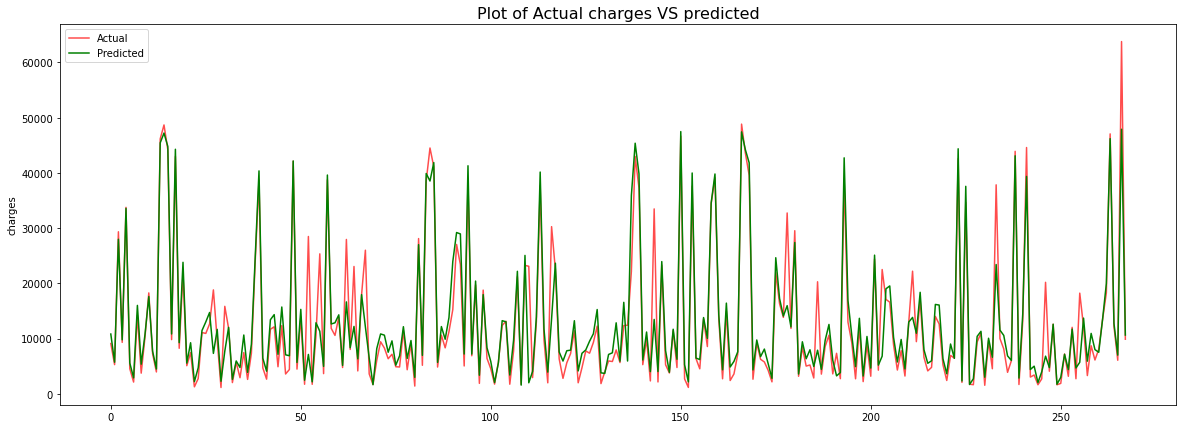

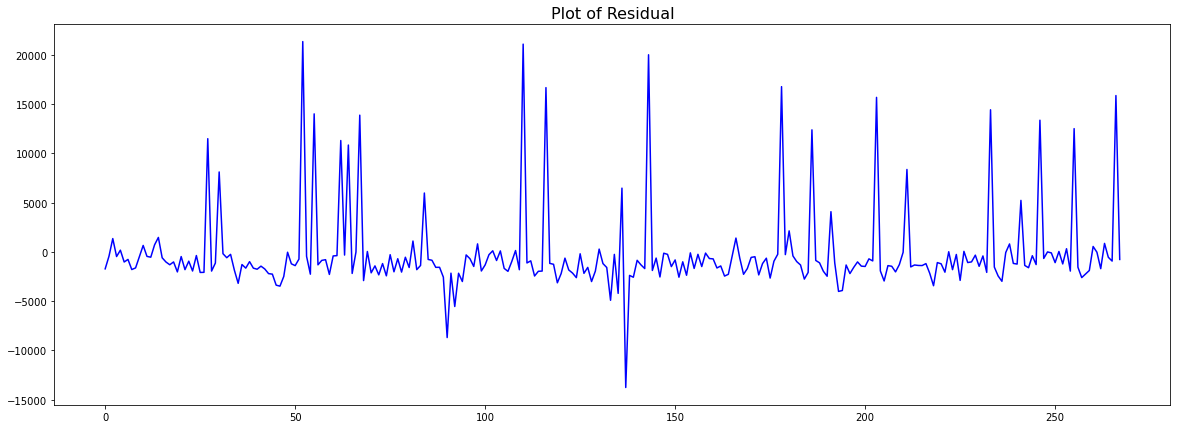

(18779217.312836375, 0.879037869537559)

In [89]:
pred_gb,rmse_gb,rsq_gb = model_runner(GradientBoostingRegressor())
rmse_gb,rsq_gb 

### XGBoost

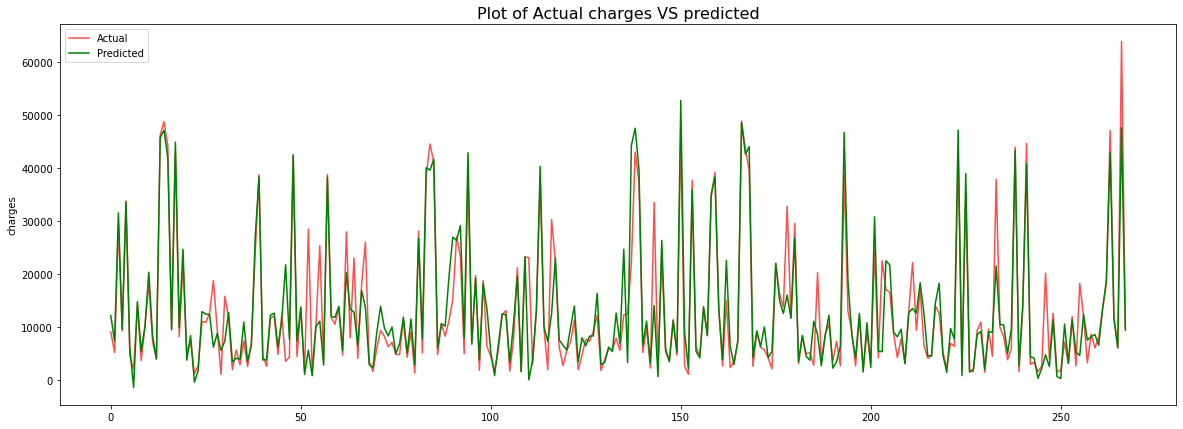

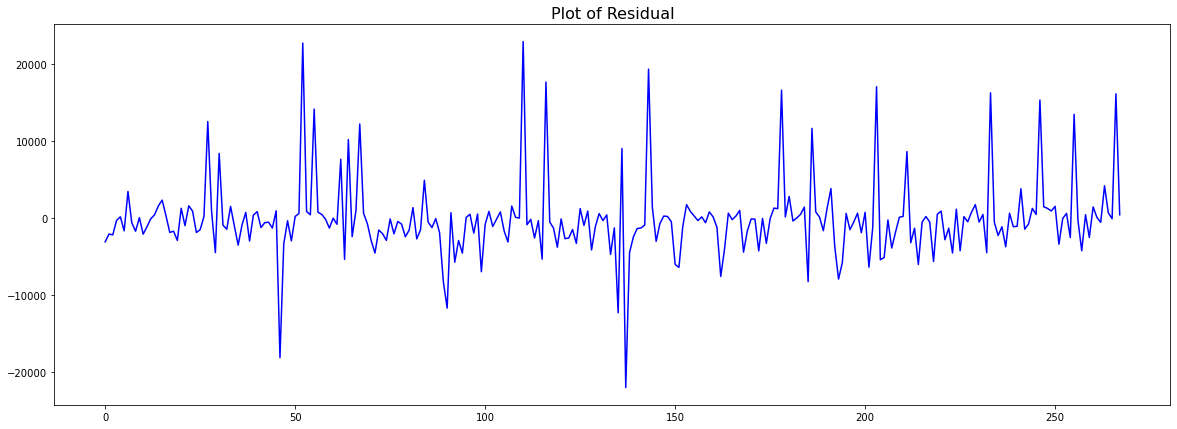

In [90]:
pred_xgb,rmse_xgb,rsq_xgb = model_runner(XGBRegressor(gamma = 0.5))

In [91]:
rmse_xgb,rsq_xgb

(25676893.351647858, 0.83460803122241)

## Stacking 1

In [92]:
estimators = [('lr', LinearRegression()),('ada', AdaBoostRegressor()),
                                          ('xgb',XGBRegressor())]
reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor())

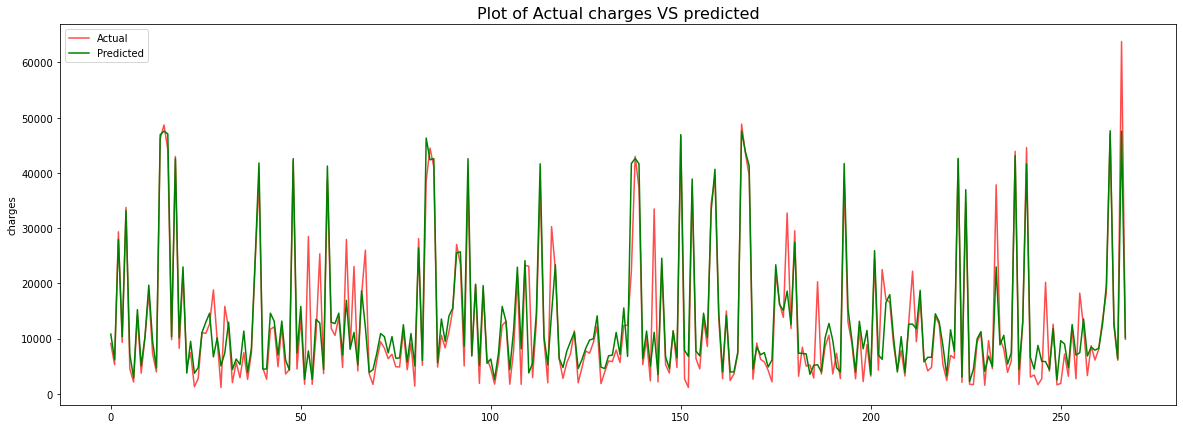

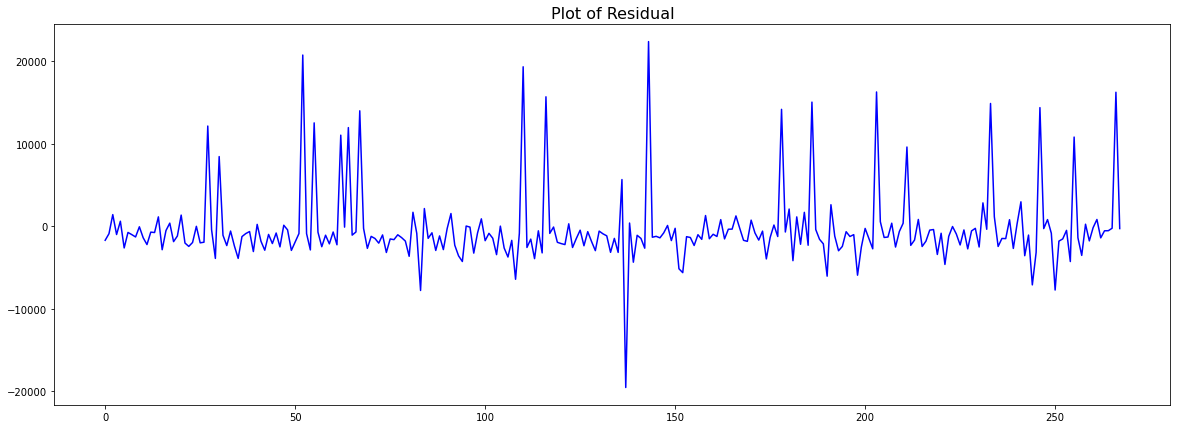

In [93]:
pred_s,rmse_s,rsq_s = model_runner(StackingRegressor(estimators=estimators,\
                                                     final_estimator=GradientBoostingRegressor()))

In [94]:
rmse_s,rsq_s

(20755386.92266672, 0.8663088147437357)

## Stacking 2

In [95]:
estimators = [('lr', LinearRegression()),('r', Ridge()),
                                          ('ls',Lasso())]
reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor())

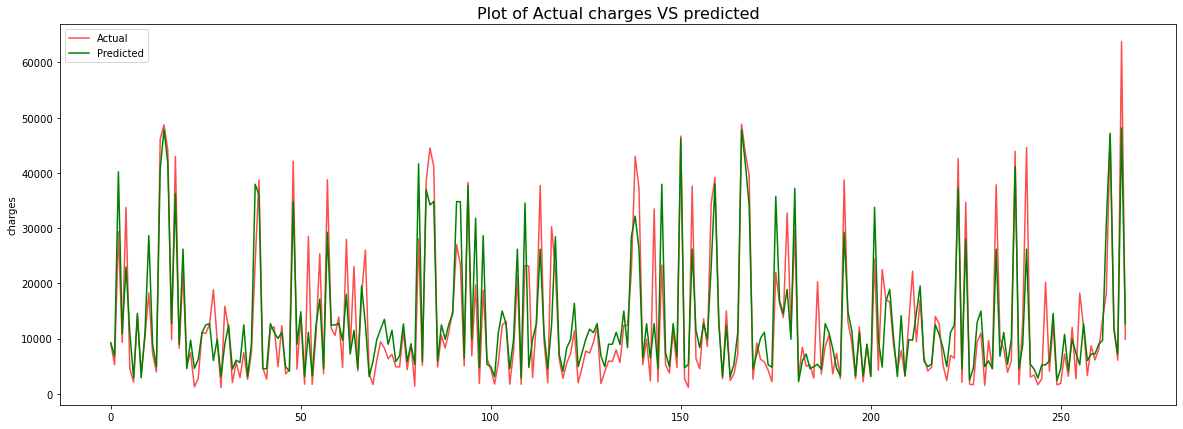

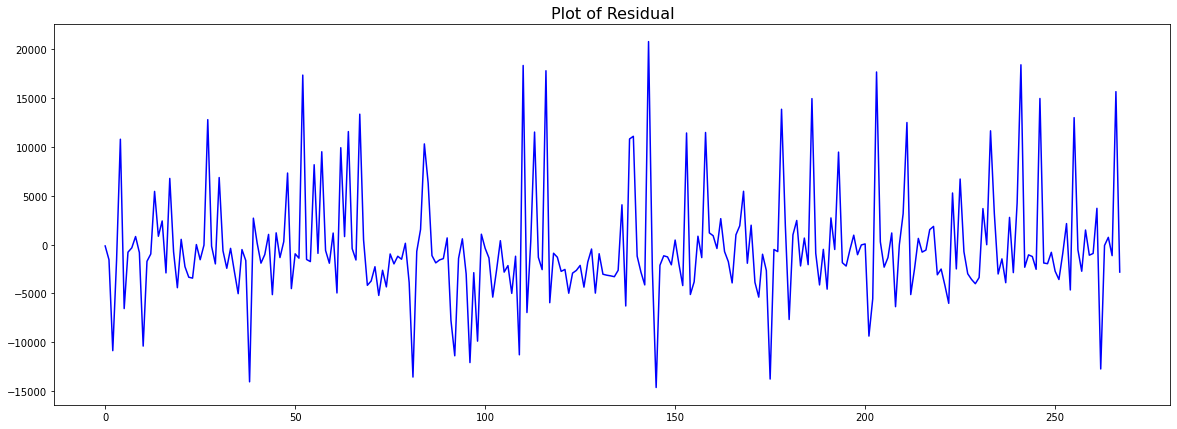

In [96]:
pred_s2,rmse_s2,rsq_s2 = model_runner(StackingRegressor(estimators=estimators,\
                                                     final_estimator=GradientBoostingRegressor()))

In [111]:
rmse_s2,rsq_s2

(32734369.716481067, 0.789148874828548)

## Stacking 3

In [97]:
estimators = [('rf',RandomForestRegressor()),('adb',AdaBoostRegressor())]
reg = StackingRegressor(estimators=estimators,final_estimator=GradientBoostingRegressor())

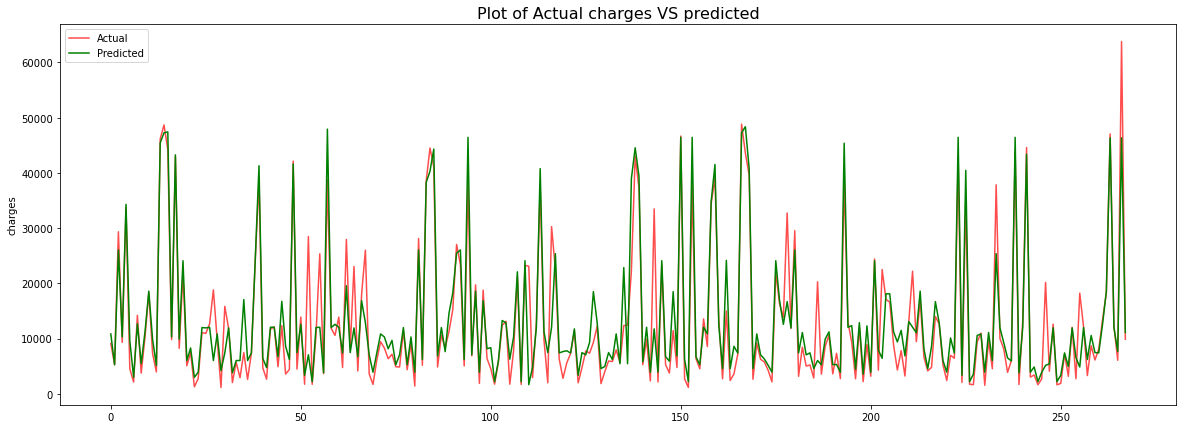

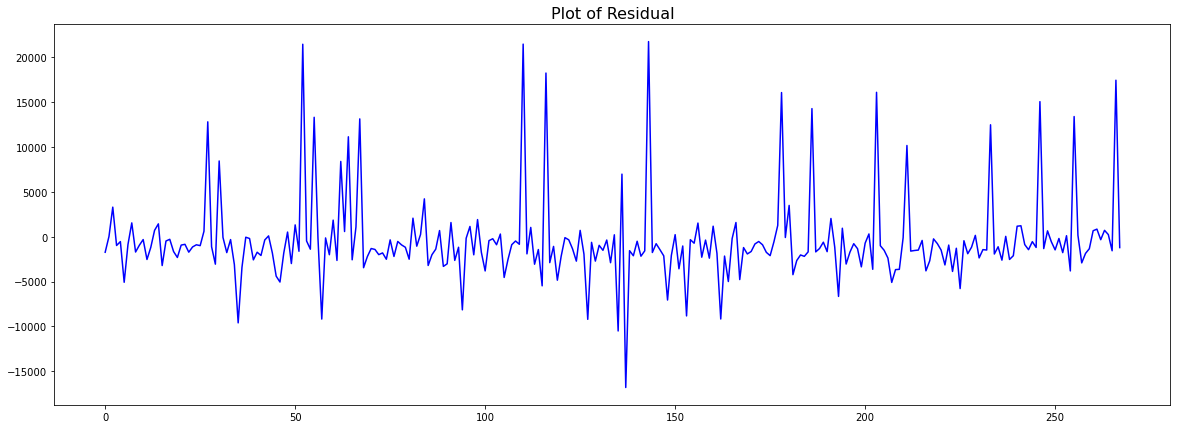

In [98]:
pred_s3,rmse_s3,rsq_s3 = model_runner(StackingRegressor(estimators=estimators,\
                                                     final_estimator=GradientBoostingRegressor()))

In [99]:
rmse_s3,rsq_s3

(23162402.628397375, 0.8508045611334046)

In [100]:
type(y_test)

pandas.core.series.Series

## Summary

In [101]:
model=['linear','ridge','lasso','ElasticNet','randomforest','xgboost','adaboost','gradientboost','Stacking']
score = [rmse_lin,rmse_r, rmse_l,rmse_eln,rmse_rf,rmse_xgb,rmse_ada,rmse_gb,rmse_s]
r2_score = [rsq_lin,rsq_r,rsq_l,rsq_eln,rsq_rf,rsq_xgb,rsq_ada, rsq_gb, rsq_s]

lst=[]
for name, rmse,r2 in zip(model,score,r2_score):
    print(f"model: {name}:\nRMSE: {rmse}\nR2_score: {r2}\n\n")
    lst.append([name,rmse,r2])

lst

model: linear:
RMSE: 33544907.381259013
R2_score: 0.7839279776463969


model: ridge:
RMSE: 33589042.145583525
R2_score: 0.7836436934277728


model: lasso:
RMSE: 33549692.667619668
R2_score: 0.7838971542939954


model: ElasticNet:
RMSE: 90349503.86407174
R2_score: 0.41803386735653103


model: randomforest:
RMSE: 18820631.003075443
R2_score: 0.8787711125093944


model: xgboost:
RMSE: 25676893.351647858
R2_score: 0.83460803122241


model: adaboost:
RMSE: 26186382.027949728
R2_score: 0.8313262738038067


model: gradientboost:
RMSE: 18779217.312836375
R2_score: 0.879037869537559


model: Stacking:
RMSE: 20755386.92266672
R2_score: 0.8663088147437357




[['linear', 33544907.381259013, 0.7839279776463969],
 ['ridge', 33589042.145583525, 0.7836436934277728],
 ['lasso', 33549692.667619668, 0.7838971542939954],
 ['ElasticNet', 90349503.86407174, 0.41803386735653103],
 ['randomforest', 18820631.003075443, 0.8787711125093944],
 ['xgboost', 25676893.351647858, 0.83460803122241],
 ['adaboost', 26186382.027949728, 0.8313262738038067],
 ['gradientboost', 18779217.312836375, 0.879037869537559],
 ['Stacking', 20755386.92266672, 0.8663088147437357]]

In [102]:
pd.DataFrame(lst,columns=['Model','RMSE','R2'])

Model          RMSE        R2
0         linear  3.354491e+07  0.783928
1          ridge  3.358904e+07  0.783644
2          lasso  3.354969e+07  0.783897
3     ElasticNet  9.034950e+07  0.418034
4   randomforest  1.882063e+07  0.878771
5        xgboost  2.567689e+07  0.834608
6       adaboost  2.618638e+07  0.831326
7  gradientboost  1.877922e+07  0.879038
8       Stacking  2.075539e+07  0.866309

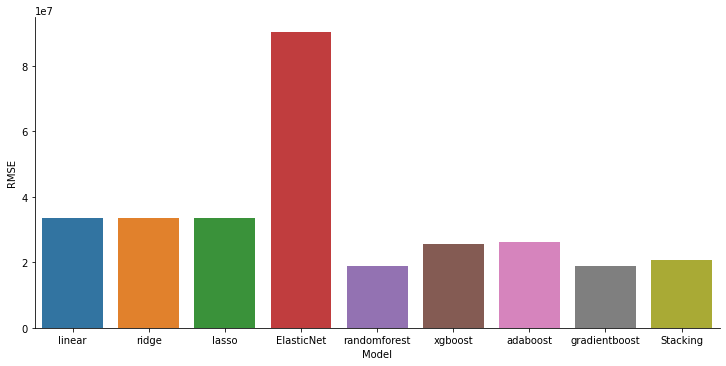

In [112]:
sns.catplot(x='Model',y='RMSE',data=pd.DataFrame(lst,columns=['Model','RMSE','R2']),kind='bar',height=5,aspect=2)

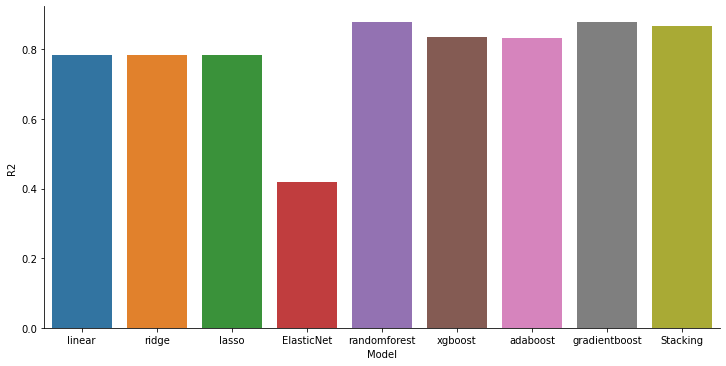

In [113]:
sns.catplot(x='Model',y='R2',data=pd.DataFrame(lst,columns=['Model','RMSE','R2']),kind='bar',height=5,aspect=2
           )

In [105]:
pred_xgb[5]

6199.0684

In [106]:
pred_gb[5]

5557.4602944711105

In [107]:
#gb is better than any other model prdicting the future value 
residual = np.array(y_test)[5] -pred_gb[5]
residual

-1021.2012944711105

In [108]:
residual = np.array(y_test)[5] -pred_xgb[5]
residual

-1662.809359375

In [109]:
residual = np.array(y_test)[10] -pred_gb[10]
residual

658.8537512364819

In [110]:
residual = np.array(y_test)[10] -pred_xgb[10]
residual

-2092.8543124999997